<a href="https://colab.research.google.com/github/SaiKumarMundru/AI/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Reading datasets

In [ ]:
features = pd.read_csv("/content/drive/MyDrive/AI/features.csv")
features.drop(['IsHoliday'], axis = 1, inplace = True)
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,05-02-2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,12-02-2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,19-02-2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,26-02-2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,05-03-2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/AI/train.csv")
train.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1.0,1,2010-02-05,24924.50,False
1,1.0,1,2010-02-12,46039.49,True
2,1.0,1,2010-02-19,41595.55,False
3,1.0,1,2010-02-26,19403.54,False
4,1.0,1,2010-03-05,21827.90,False


# Merging the two data sets based on the common arttributes(columns) store and data

In [ ]:
mldata=pd.merge(train,features,left_on=['Store','Date'],right_on=['Store','Date'],how='left')
mldata

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1117: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1.0,1,2010-02-05,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1,2010-02-12,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1,2010-02-19,41595.55,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1,2010-02-26,19403.54,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1,2010-03-05,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455802,45.0,98,2012-09-28,508.37,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455803,45.0,98,2012-10-05,628.10,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455804,45.0,98,2012-10-12,1061.02,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455805,45.0,98,2012-10-19,760.01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dealing with the date column

In [ ]:
mldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455807 entries, 0 to 455806
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         455807 non-null  float64
 1   Dept          455807 non-null  object 
 2   Date          455806 non-null  object 
 3   Weekly_Sales  455806 non-null  float64
 4   IsHoliday     455805 non-null  object 
 5   Temperature   0 non-null       float64
 6   Fuel_Price    0 non-null       float64
 7   MarkDown1     0 non-null       float64
 8   MarkDown2     0 non-null       float64
 9   MarkDown3     0 non-null       float64
 10  MarkDown4     0 non-null       float64
 11  MarkDown5     0 non-null       float64
 12  CPI           0 non-null       float64
 13  Unemployment  0 non-null       float64
dtypes: float64(11), object(3)
memory usage: 52.2+ MB


In [ ]:
mldata['Date'] = pd.to_datetime(mldata['Date'])

In [ ]:
mldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455807 entries, 0 to 455806
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         455807 non-null  float64       
 1   Dept          455807 non-null  object        
 2   Date          455806 non-null  datetime64[ns]
 3   Weekly_Sales  455806 non-null  float64       
 4   IsHoliday     455805 non-null  object        
 5   Temperature   0 non-null       float64       
 6   Fuel_Price    0 non-null       float64       
 7   MarkDown1     0 non-null       float64       
 8   MarkDown2     0 non-null       float64       
 9   MarkDown3     0 non-null       float64       
 10  MarkDown4     0 non-null       float64       
 11  MarkDown5     0 non-null       float64       
 12  CPI           0 non-null       float64       
 13  Unemployment  0 non-null       float64       
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 52.2+ MB


In [ ]:
mldata['year'] = mldata['Date'].dt.year
mldata['month'] = mldata['Date'].dt.month
mldata['day'] = mldata['Date'].dt.day
mldata

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,1.0,1,2010-02-05,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,5.0
1,1.0,1,2010-02-12,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,12.0
2,1.0,1,2010-02-19,41595.55,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,19.0
3,1.0,1,2010-02-26,19403.54,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,26.0
4,1.0,1,2010-03-05,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455802,45.0,98,2012-09-28,508.37,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,9.0,28.0
455803,45.0,98,2012-10-05,628.10,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,10.0,5.0
455804,45.0,98,2012-10-12,1061.02,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,10.0,12.0
455805,45.0,98,2012-10-19,760.01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,10.0,19.0


In [ ]:
sales=mldata.copy(deep=True)

In [ ]:
mldata.drop(['Date'], axis = 1, inplace = True)

In [ ]:
mldata

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,1.0,1,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,5.0
1,1.0,1,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,12.0
2,1.0,1,41595.55,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,19.0
3,1.0,1,19403.54,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,26.0
4,1.0,1,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455802,45.0,98,508.37,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,9.0,28.0
455803,45.0,98,628.10,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,10.0,5.0
455804,45.0,98,1061.02,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,10.0,12.0
455805,45.0,98,760.01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,10.0,19.0


# Converting the values in IsHoliday column in to numerical(i.e True to 1 and False to 2)

In [ ]:
mldata['IsHoliday']=mldata['IsHoliday'].astype('float')
mldata

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
0,1.0,1,24924.50,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,5.0
1,1.0,1,46039.49,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,12.0
2,1.0,1,41595.55,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,19.0
3,1.0,1,19403.54,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,26.0
4,1.0,1,21827.90,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455802,45.0,98,508.37,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,9.0,28.0
455803,45.0,98,628.10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,10.0,5.0
455804,45.0,98,1061.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,10.0,12.0
455805,45.0,98,760.01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,10.0,19.0


In [ ]:
mldata.shape

(455807, 16)

# Correlation

In [ ]:
corelation=mldata.corr()
round(corelation,3)

,Store,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
Store,1.000,-0.075,-0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003,0.001,-0.000
Weekly_Sales,-0.075,1.000,0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011,0.029,-0.006
IsHoliday,-0.001,0.013,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.057,0.123,0.045
Temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarkDown1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarkDown2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarkDown3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarkDown4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarkDown5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


correlation between the weeklysales and the other columns 

In [ ]:
mldata.corr().loc[:,'Weekly_Sales'].abs().sort_values(ascending=False)[1:]

Store           0.074961
month           0.028922
IsHoliday       0.012743
year            0.010648
day             0.005879
Temperature          NaN
Fuel_Price           NaN
MarkDown1            NaN
MarkDown2            NaN
MarkDown3            NaN
MarkDown4            NaN
MarkDown5            NaN
CPI                  NaN
Unemployment         NaN
Name: Weekly_Sales, dtype: float64

In [ ]:
sns.set(rc={'figure.figsize':(25,25)})

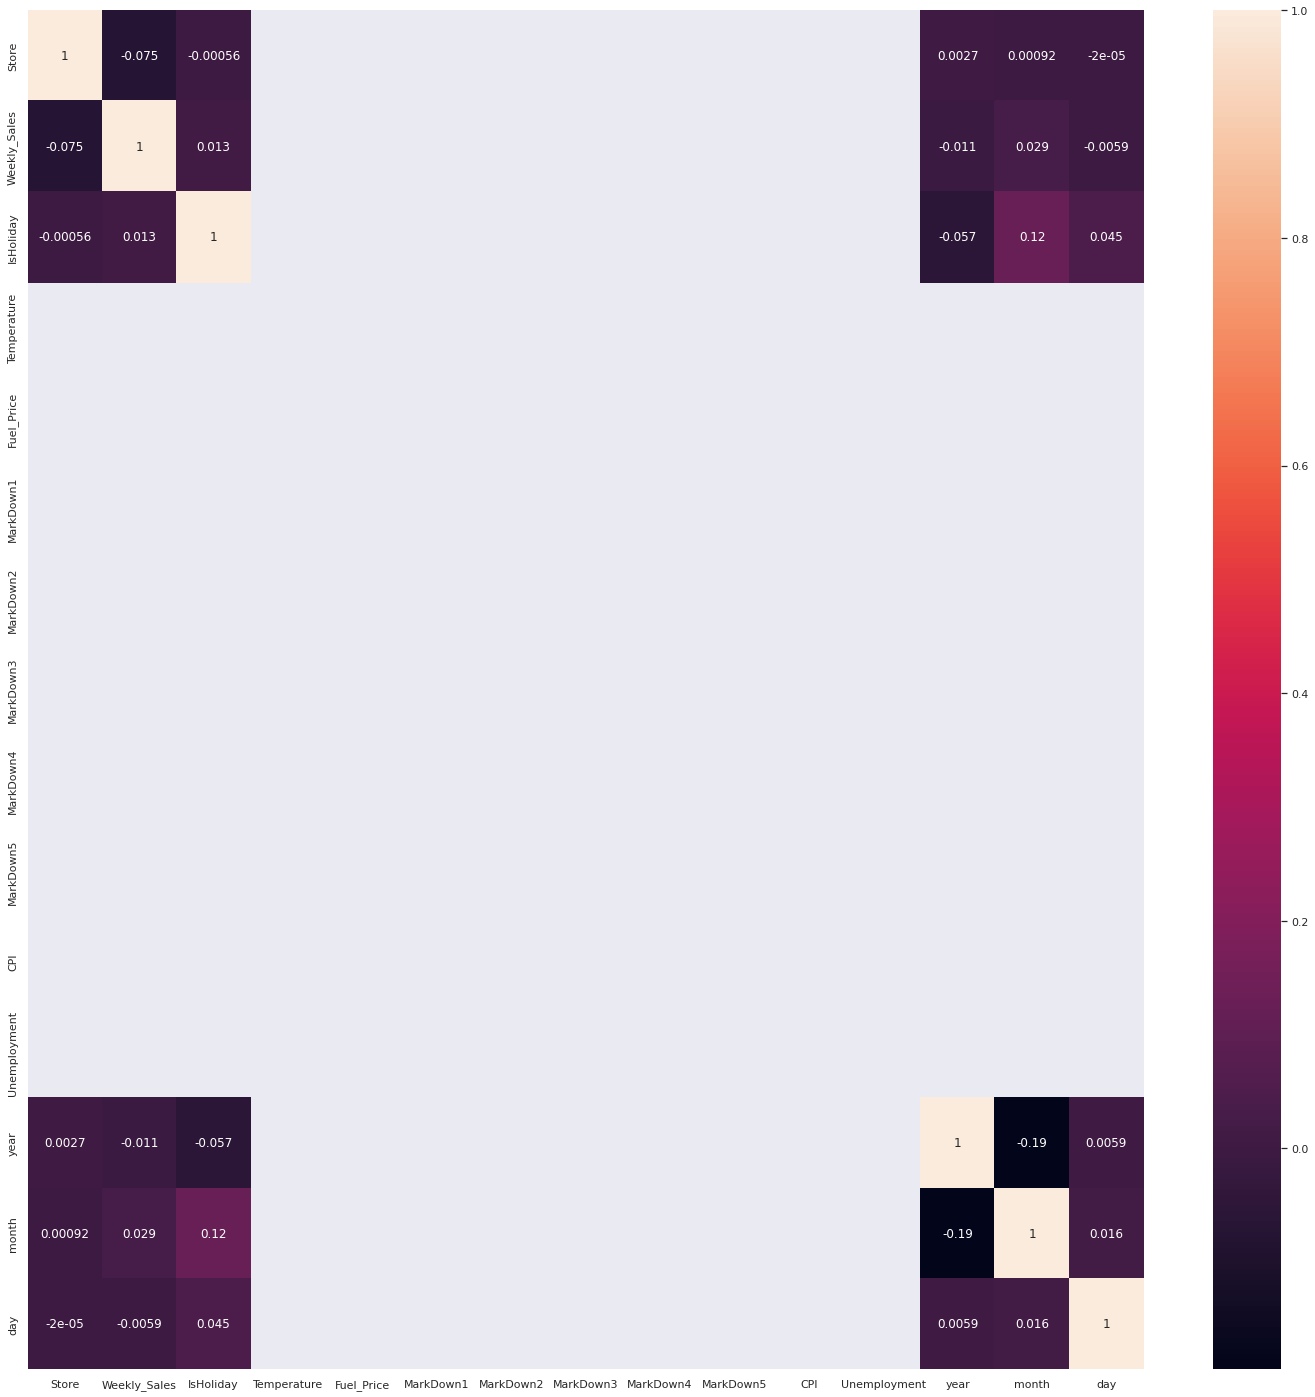

In [ ]:
sns.heatmap(mldata.corr(), annot=True)

# Outliers Treatment

Outliers Treatment in column weeklysales

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})

In [ ]:
mldata['Weekly_Sales'].describe()

count    455806.000000
mean      15617.336950
std       22235.148037
min       -4988.940000
25%        2078.330000
50%        7458.930000
75%       19699.340000
max      693099.360000
Name: Weekly_Sales, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


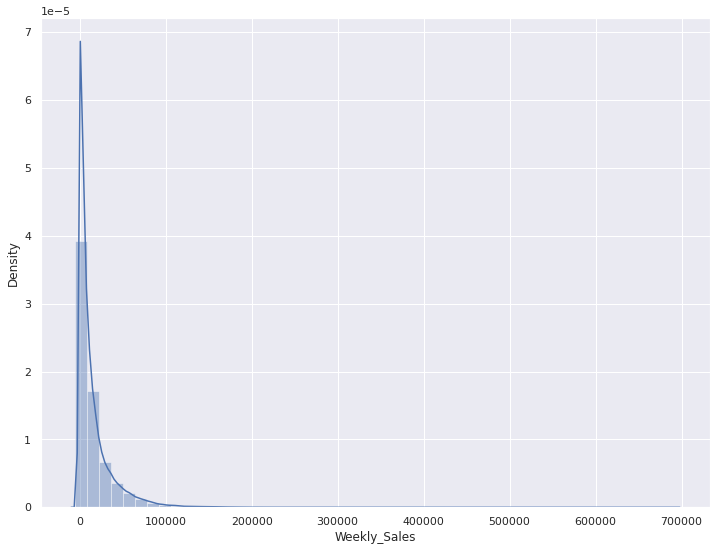

In [ ]:
sns.distplot(mldata['Weekly_Sales'])

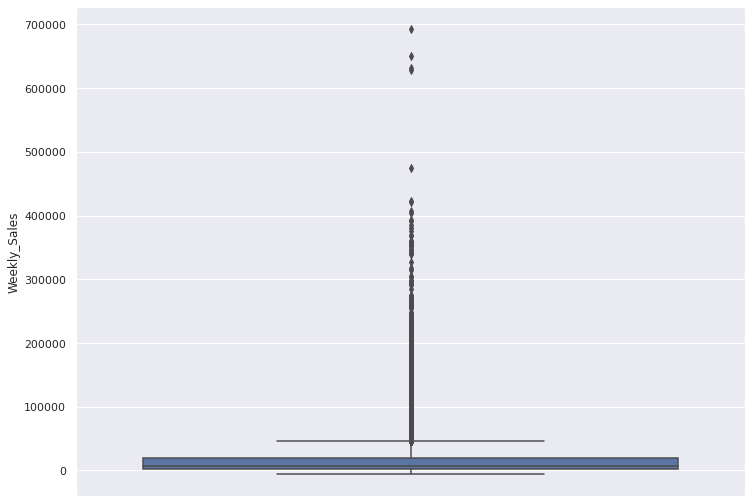

In [ ]:
sns.boxplot(y=mldata['Weekly_Sales'])

In [ ]:
# Finding the IQR
percentile25 = mldata['Weekly_Sales'].quantile(0.25)
percentile75 = mldata['Weekly_Sales'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

17621.010000000002

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 46130.855
Lower limit -24353.185000000005


In [ ]:
mldata[mldata['Weekly_Sales'] > upper_limit]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day
8,1.0,1,57258.43,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,4.0,2.0
46,1.0,1,55931.23,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,12.0,24.0
54,1.0,1,46845.87,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,2.0,18.0
63,1.0,1,50510.31,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,4.0,22.0
98,1.0,1,46788.75,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,12.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455522,45.0,95,49380.11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,9.0,28.0
455523,45.0,95,50241.01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,10.0,5.0
455524,45.0,95,49334.77,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,10.0,12.0
455525,45.0,95,48434.97,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,10.0,19.0


In [ ]:
mldata[mldata['Weekly_Sales'] < lower_limit]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day


In [ ]:
mldata['Weekly_Sales'] = np.where(
    mldata['Weekly_Sales'] > upper_limit,
    upper_limit,
    np.where(
        mldata['Weekly_Sales'] < lower_limit,
        lower_limit,
        mldata['Weekly_Sales']
    )
)

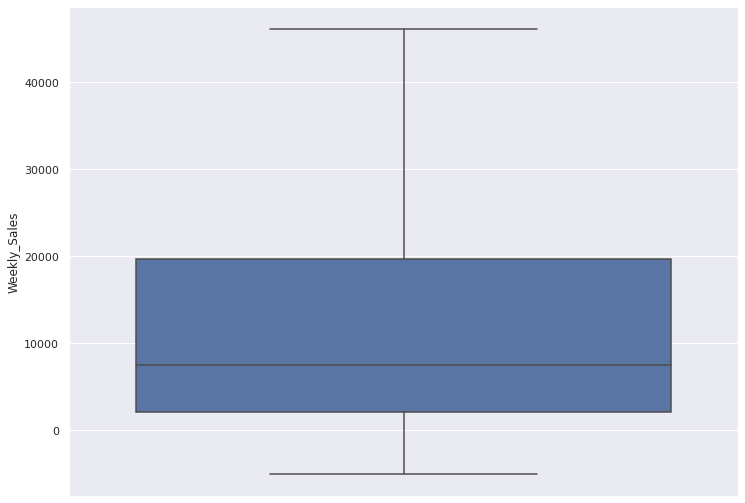

In [ ]:
sns.boxplot(y=mldata['Weekly_Sales'])

In [ ]:
mldata['Weekly_Sales'].shape

(455807,)

In [ ]:
mldata['Weekly_Sales'].describe()

count    455806.000000
mean      13311.975427
std       14501.745875
min       -4988.940000
25%        2078.330000
50%        7458.930000
75%       19699.340000
max       46130.855000
Name: Weekly_Sales, dtype: float64

**outliers in temperature**

In [ ]:
mldata['Temperature'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Temperature, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


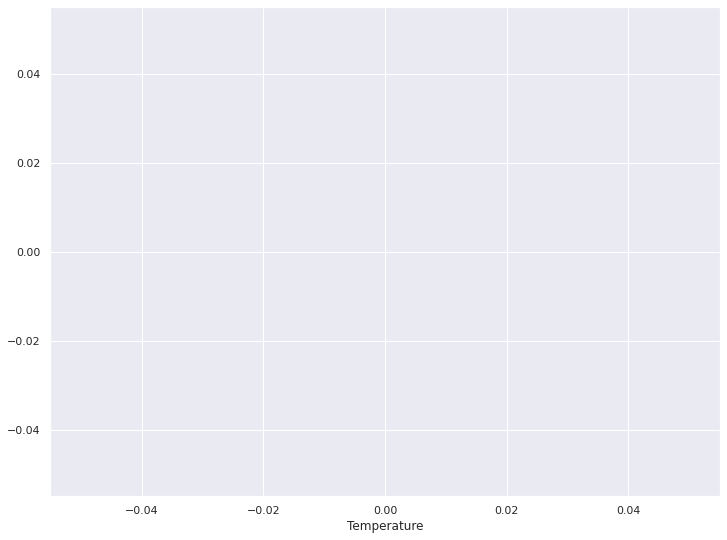

In [ ]:
sns.distplot(mldata['Temperature'])

In [ ]:
mldata['Temperature'].skew()

nan

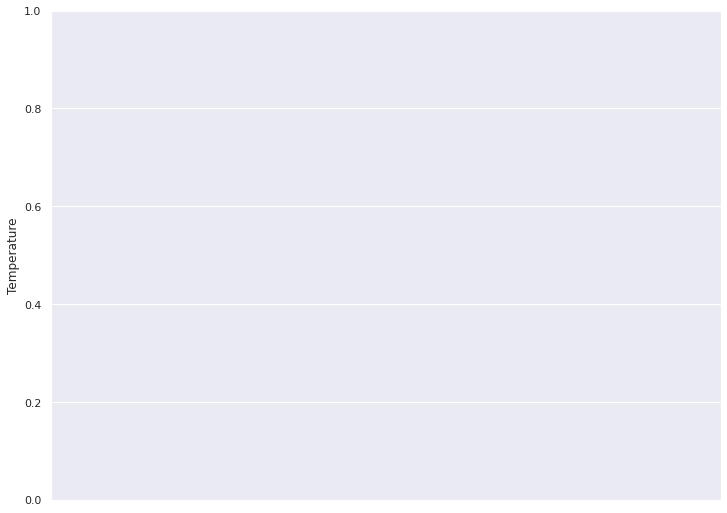

In [ ]:
sns.boxplot(y=mldata['Temperature'])

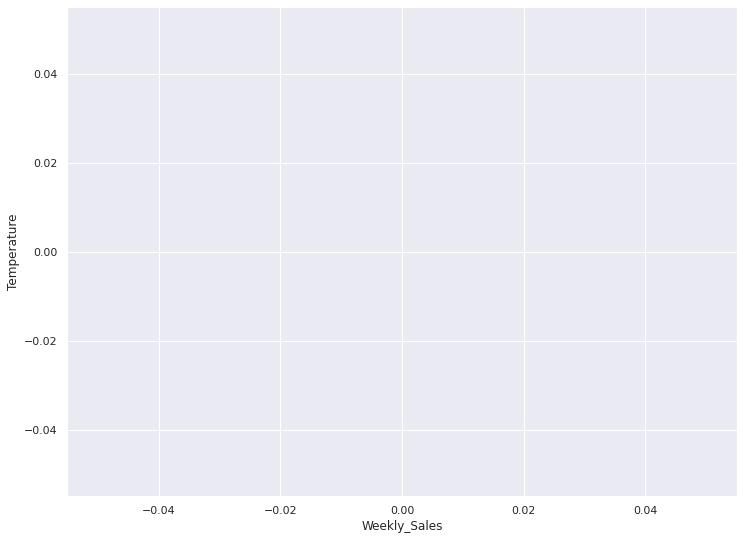

In [ ]:
sns.regplot(x='Weekly_Sales',y='Temperature',scatter=True,fit_reg=False,data=mldata)

In [ ]:
upper_limit = mldata['Temperature'].mean() + 3*mldata['Temperature'].std()
lower_limit = mldata['Temperature'].mean() - 3*mldata['Temperature'].std()

In [ ]:
upper_limit

nan

In [ ]:
lower_limit

nan

In [ ]:
mldata['Temperature'] = np.where(
    mldata['Temperature']>upper_limit,
   mldata['Temperature'],
    np.where(
        mldata['Temperature']<lower_limit,
        lower_limit,
       mldata['Temperature']
    )
)

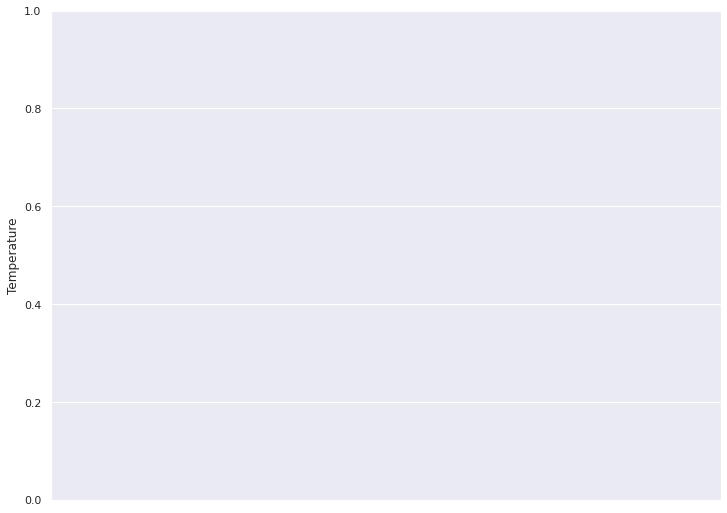

In [ ]:
sns.boxplot(y=mldata['Temperature'])

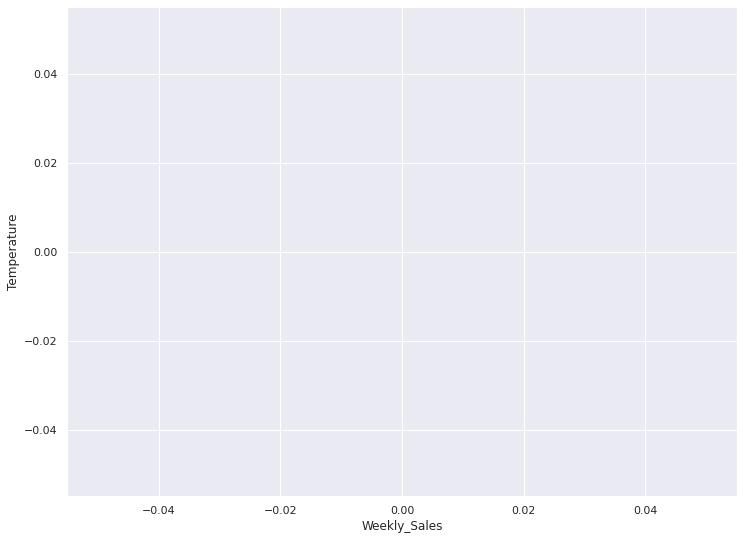

In [ ]:
sns.regplot(x='Weekly_Sales',y='Temperature',scatter=True,fit_reg=False,data=mldata)

**Outliers in fuel price**

In [ ]:
mldata['Fuel_Price'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Fuel_Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


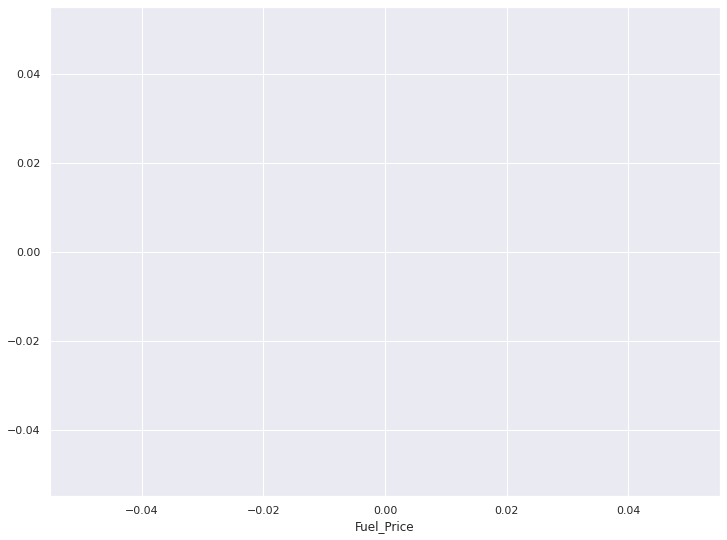

In [ ]:
sns.distplot(mldata['Fuel_Price'])

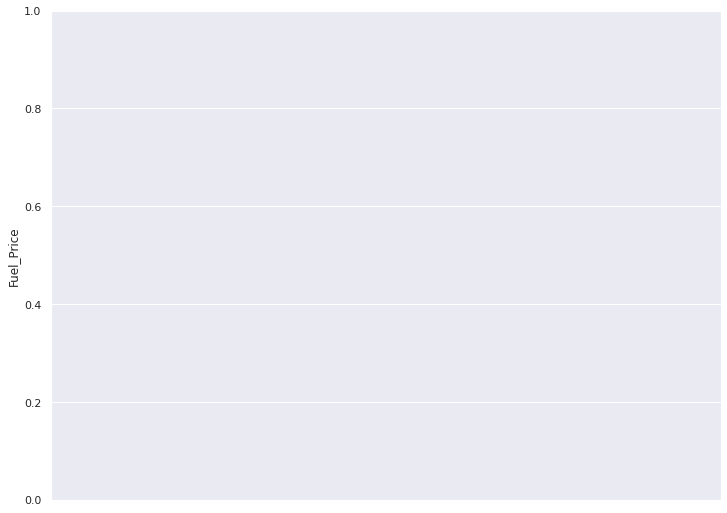

In [ ]:
sns.boxplot(y=mldata['Fuel_Price'])

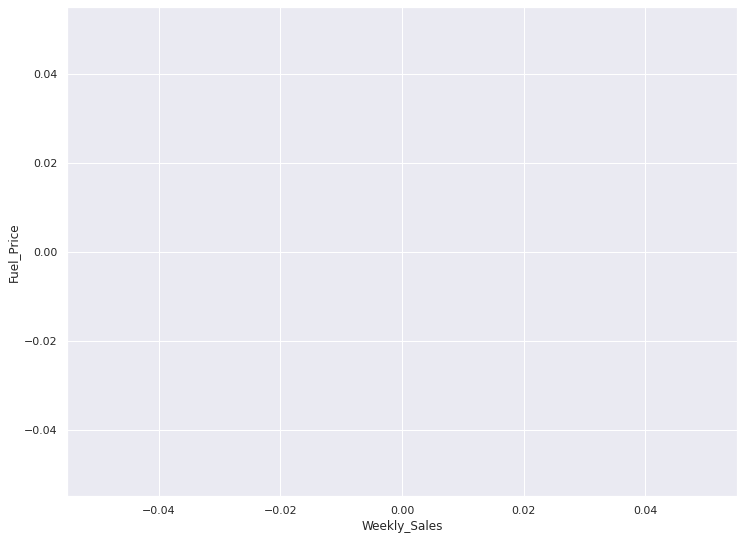

In [ ]:
sns.regplot(x='Weekly_Sales',y='Fuel_Price',scatter=True,fit_reg=False,data=mldata)

**outliers in cpi(Consumer Price Index)**

In [ ]:
mldata['CPI'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CPI, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


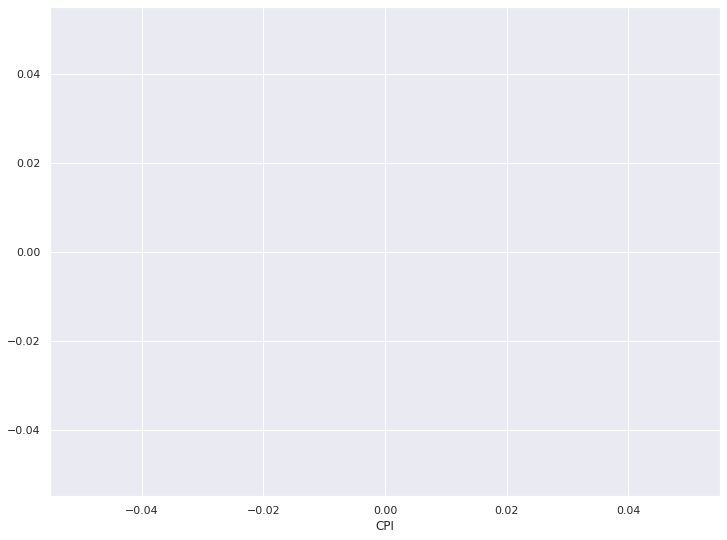

In [ ]:
sns.distplot(mldata['CPI'])

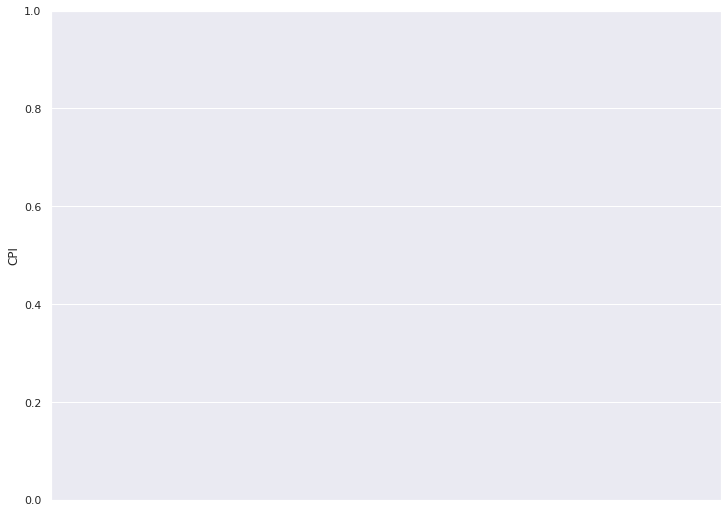

In [ ]:
sns.boxplot(y=mldata['CPI'])

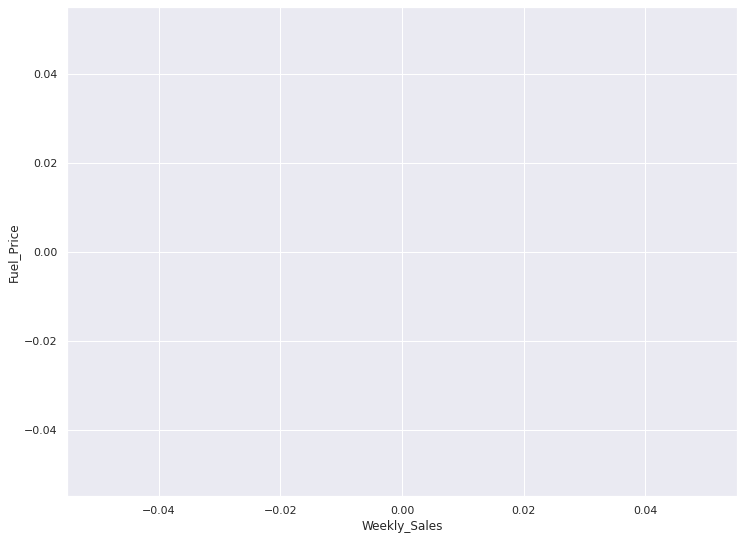

In [ ]:

sns.regplot(x='Weekly_Sales',y='Fuel_Price',scatter=True,fit_reg=False,data=mldata)

**outliers in Unemployment Rate**

In [ ]:
mldata['Unemployment'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unemployment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


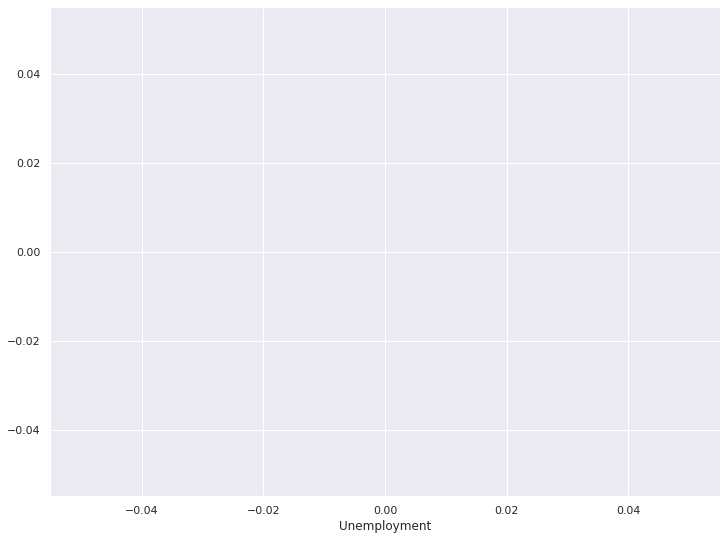

In [ ]:
sns.distplot(mldata['Unemployment'])

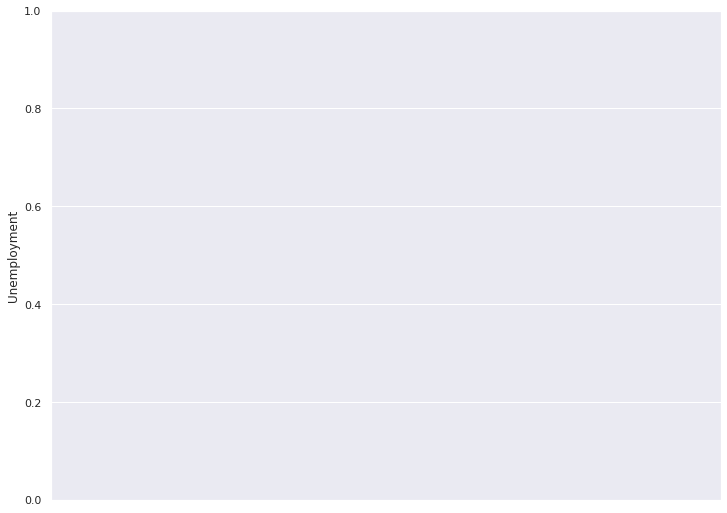

In [ ]:
sns.boxplot(y=mldata['Unemployment'])

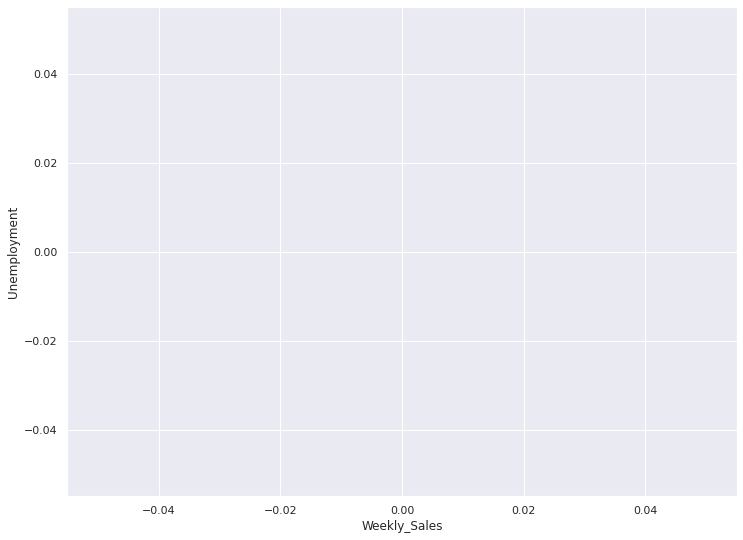

In [ ]:
sns.regplot(x='Weekly_Sales',y='Unemployment',scatter=True,fit_reg=False,data=mldata)

In [ ]:
percentile25 = mldata['Unemployment'].quantile(0.25)
percentile75 = mldata['Unemployment'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

nan

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit nan
Lower limit nan


In [ ]:
mldata[mldata['Unemployment'] > upper_limit]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day


In [ ]:
mldata[mldata['Unemployment'] < lower_limit]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day


In [ ]:
mldata['Unemployment'] = np.where(
    mldata['Unemployment'] > upper_limit,
    upper_limit,
    np.where(
        mldata['Unemployment'] < lower_limit,
        lower_limit,
        mldata['Unemployment']
    )
)

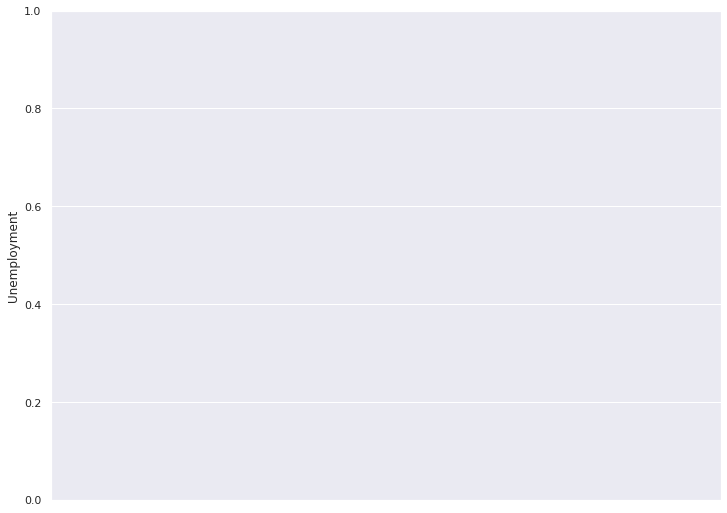

In [ ]:
sns.boxplot(y=mldata['Unemployment'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


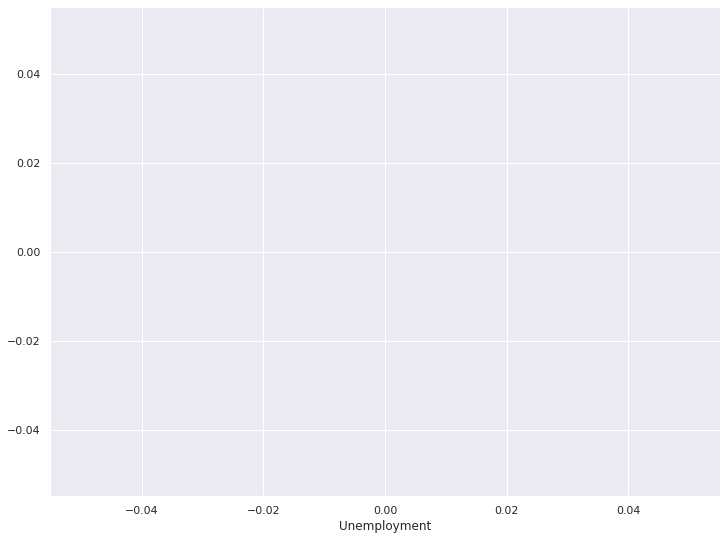

In [ ]:
sns.distplot(mldata['Unemployment'])

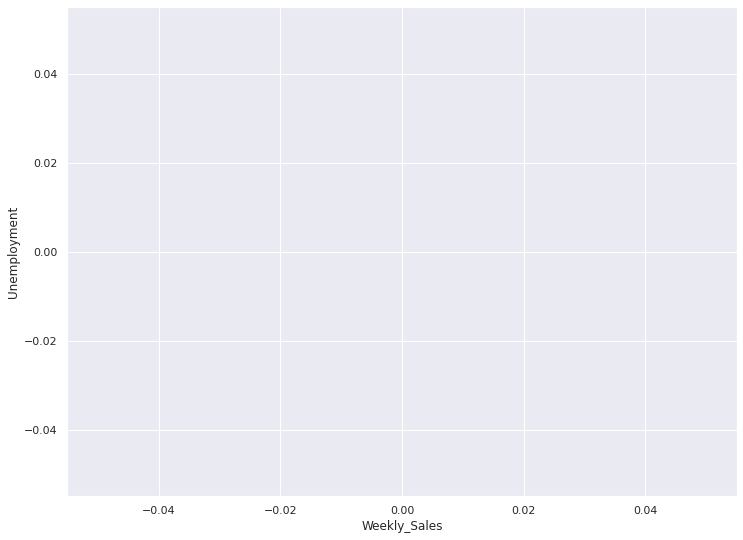

In [ ]:
sns.regplot(x='Weekly_Sales',y='Unemployment',scatter=True,fit_reg=False,data=mldata)

 outliers in markdown1

In [ ]:
mldata['MarkDown1'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown1, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


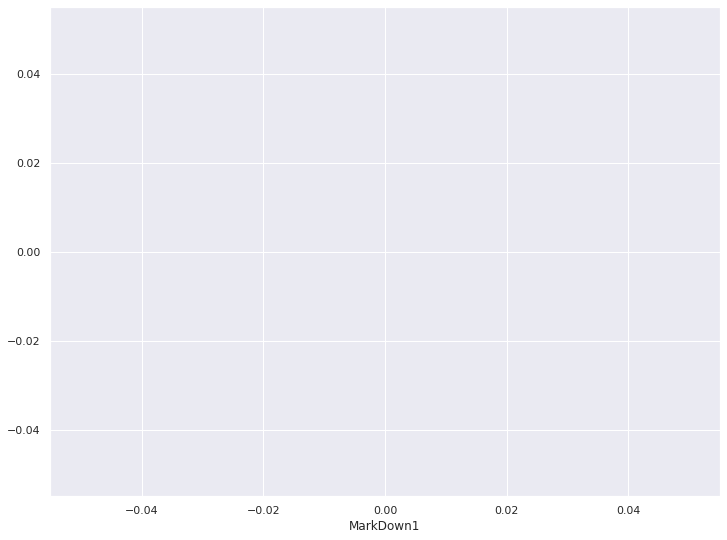

In [ ]:
sns.distplot(mldata['MarkDown1'])

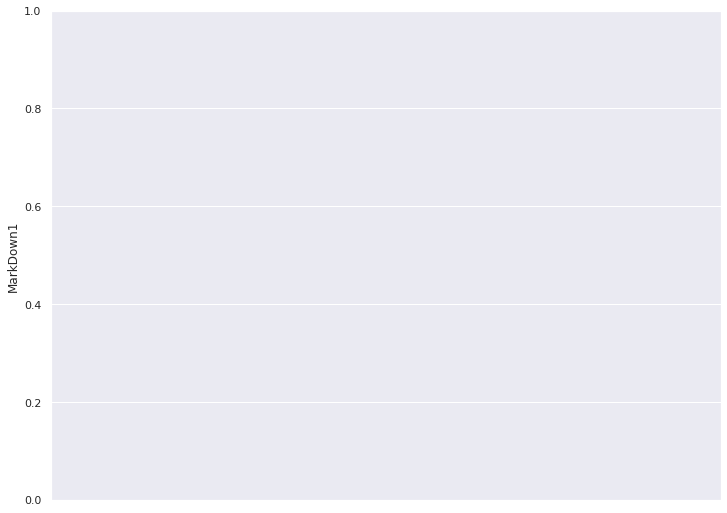

In [ ]:
sns.boxplot(y=mldata['MarkDown1'])

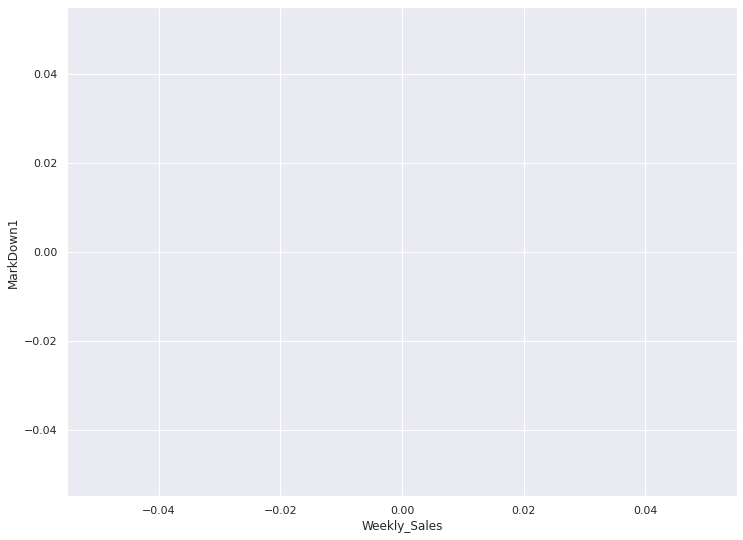

In [ ]:
sns.regplot(x='Weekly_Sales',y='MarkDown1',scatter=True,fit_reg=False,data=mldata)

In [ ]:
percentile25 = mldata['MarkDown1'].quantile(0.25)
percentile75 = mldata['MarkDown1'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

nan

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit nan
Lower limit nan


In [ ]:
mldata['MarkDown1'] = np.where(
    mldata['MarkDown1'] > upper_limit,
    upper_limit,
    np.where(
        mldata['MarkDown1'] < lower_limit,
        lower_limit,
        mldata['MarkDown1']
    )
)

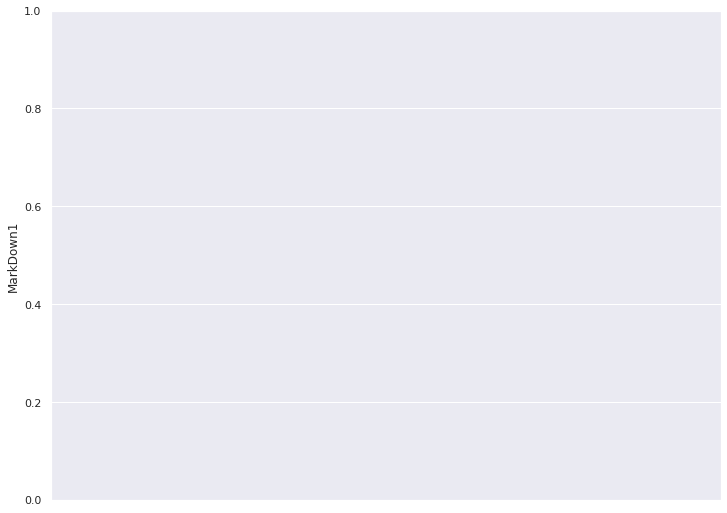

In [ ]:
sns.boxplot(y=mldata['MarkDown1'])

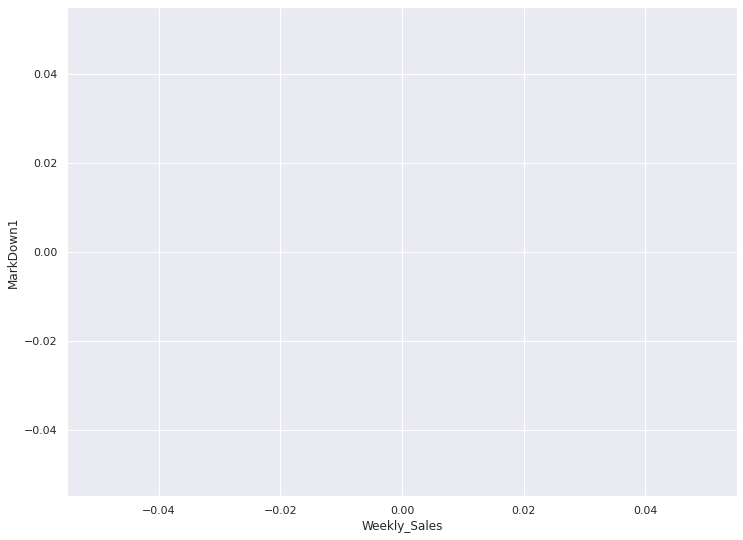

In [ ]:
sns.regplot(x='Weekly_Sales',y='MarkDown1',scatter=True,fit_reg=False,data=mldata)

outliers in Markdown2

In [ ]:
mldata['MarkDown2'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown2, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


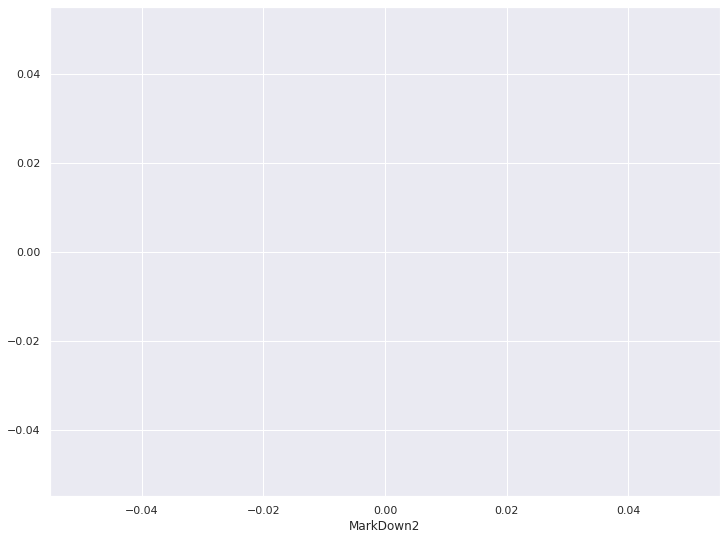

In [ ]:
sns.distplot(mldata['MarkDown2'])

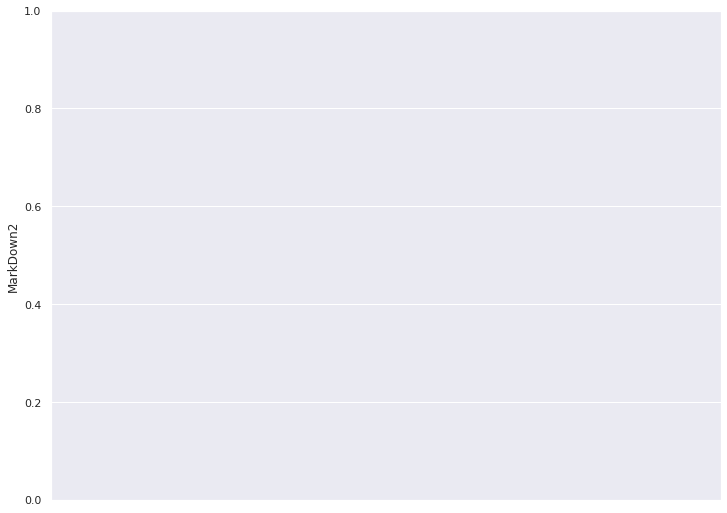

In [ ]:
sns.boxplot(y=mldata['MarkDown2'])

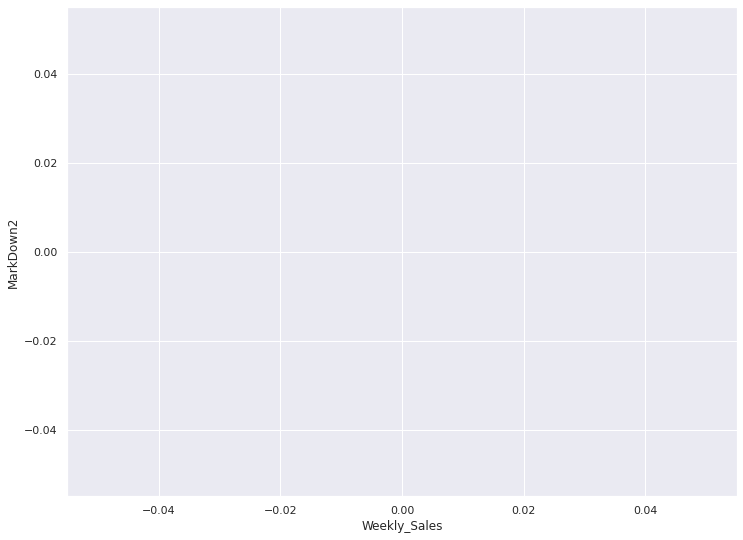

In [ ]:
sns.regplot(x='Weekly_Sales',y='MarkDown2',scatter=True,fit_reg=False,data=mldata)

In [ ]:
percentile25 = mldata['MarkDown2'].quantile(0.25)
percentile75 = mldata['MarkDown2'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

nan

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit nan
Lower limit nan


In [ ]:
mldata['MarkDown2'] = np.where(
    mldata['MarkDown2'] > upper_limit,
    upper_limit,
    np.where(
        mldata['MarkDown2'] < lower_limit,
        lower_limit,
        mldata['MarkDown2']
    )
)

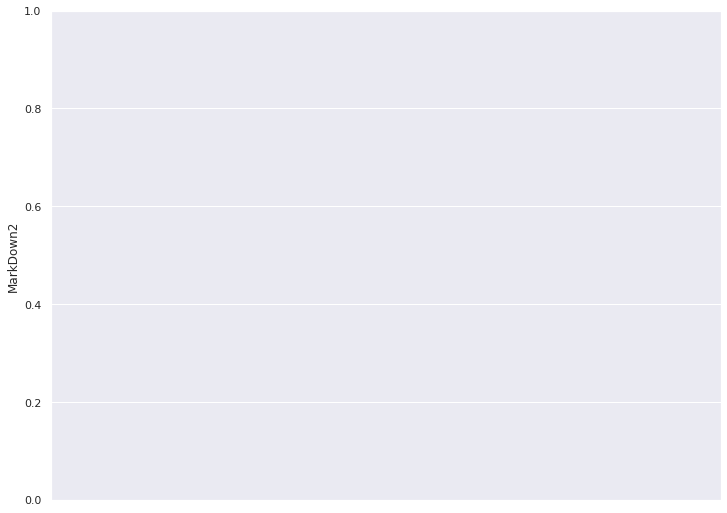

In [ ]:
sns.boxplot(y=mldata['MarkDown2'])

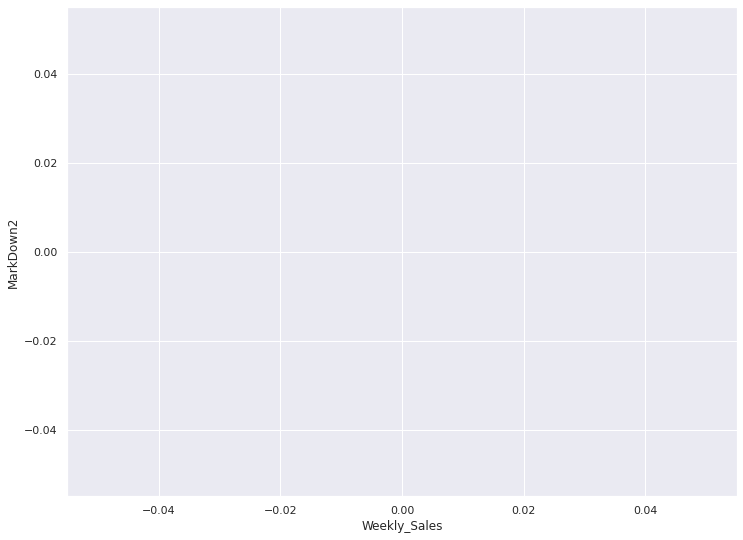

In [ ]:
sns.regplot(x='Weekly_Sales',y='MarkDown2',scatter=True,fit_reg=False,data=mldata)

outliers in markdown3

In [ ]:
mldata['MarkDown3'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown3, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


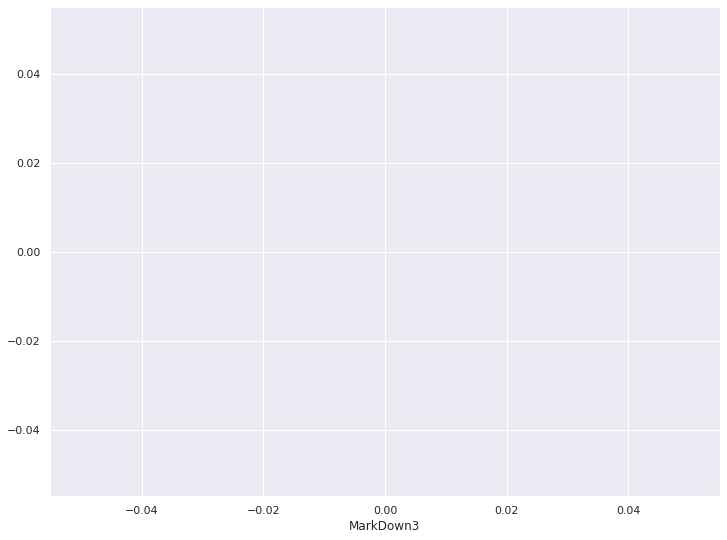

In [ ]:
sns.distplot(mldata['MarkDown3'])

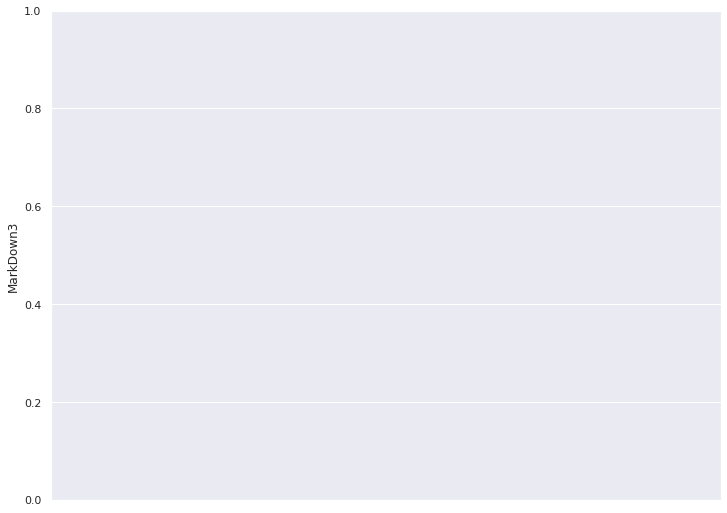

In [ ]:
sns.boxplot(y=mldata['MarkDown3'])

In [ ]:
percentile25 = mldata['MarkDown3'].quantile(0.25)
percentile75 = mldata['MarkDown3'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

nan

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit nan
Lower limit nan


In [ ]:
mldata['MarkDown3'] = np.where(
    mldata['MarkDown3'] > upper_limit,
    upper_limit,
    np.where(
        mldata['MarkDown3'] < lower_limit,
        lower_limit,
        mldata['MarkDown3']
    )
)

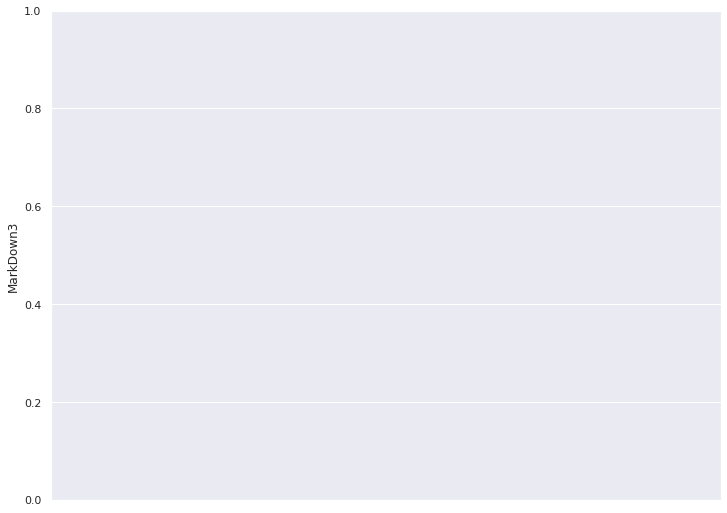

In [ ]:
sns.boxplot(y=mldata['MarkDown3'])

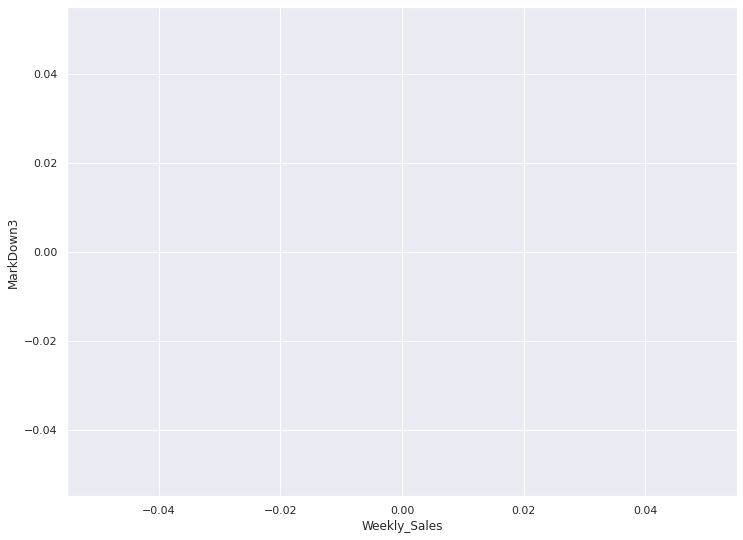

In [ ]:
sns.regplot(x='Weekly_Sales',y='MarkDown3',scatter=True,fit_reg=False,data=mldata)

outliers in markdown4

In [ ]:
mldata['MarkDown4'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown4, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


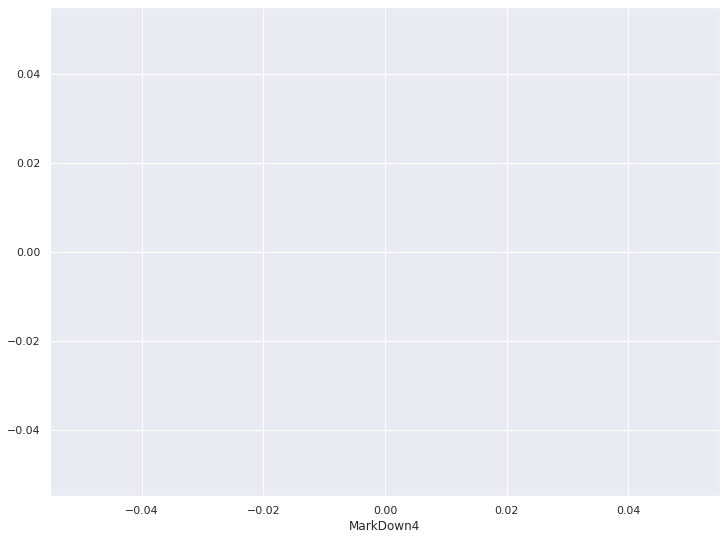

In [ ]:
sns.distplot(mldata['MarkDown4'])

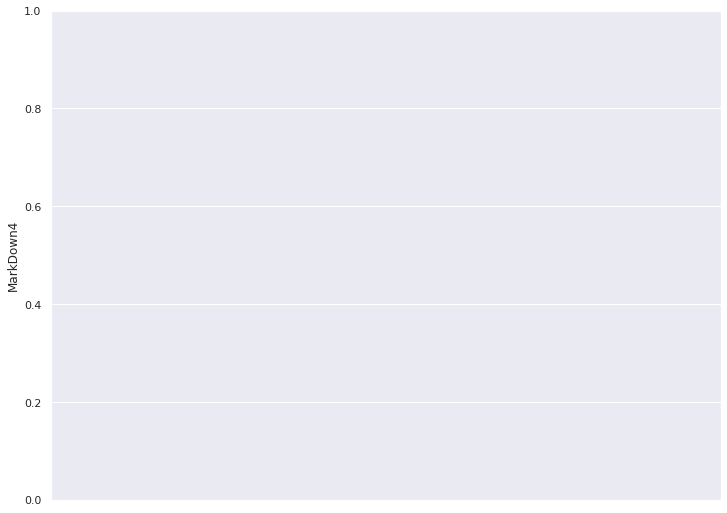

In [ ]:
sns.boxplot(y=mldata['MarkDown4'])

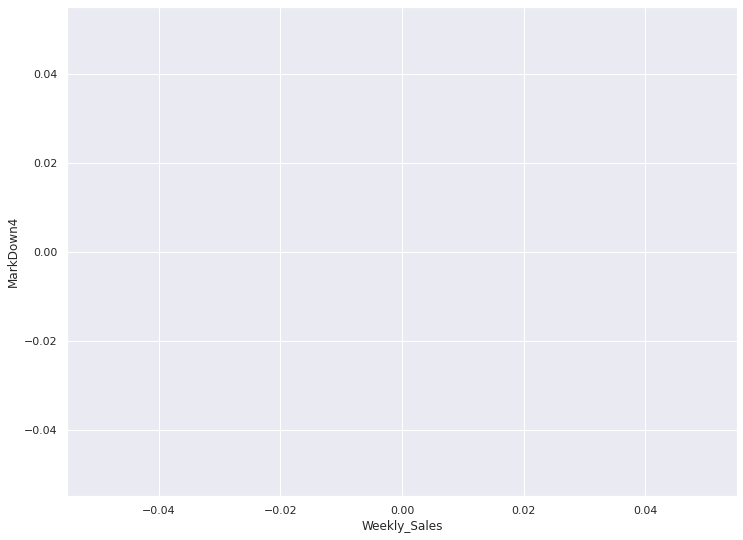

In [ ]:
sns.regplot(x='Weekly_Sales',y='MarkDown4',scatter=True,fit_reg=False,data=mldata)

In [ ]:
percentile25 = mldata['MarkDown4'].quantile(0.25)
percentile75 = mldata['MarkDown4'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

nan

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit nan
Lower limit nan


In [ ]:
mldata['MarkDown4'] = np.where(
    mldata['MarkDown4'] > upper_limit,
    upper_limit,
    np.where(
        mldata['MarkDown4'] < lower_limit,
        lower_limit,
        mldata['MarkDown4']
    )
)

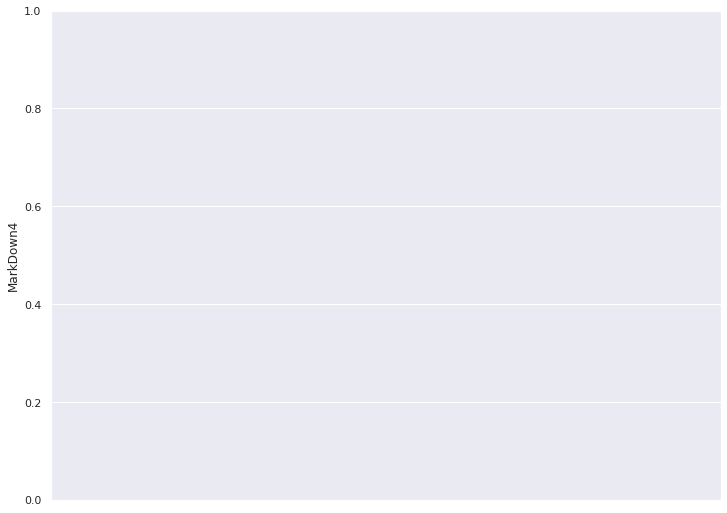

In [ ]:
sns.boxplot(y=mldata['MarkDown4'])

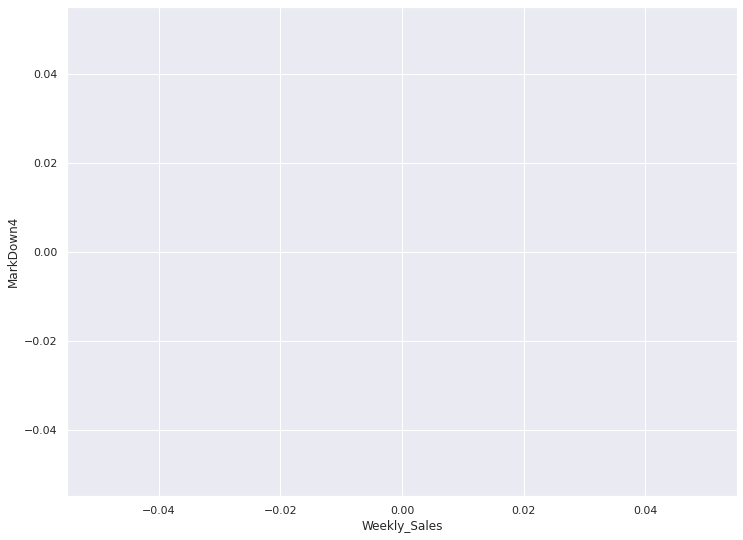

In [ ]:
sns.regplot(x='Weekly_Sales',y='MarkDown4',scatter=True,fit_reg=False,data=mldata)

outliers in markdown5

In [ ]:
mldata['MarkDown5'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MarkDown5, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


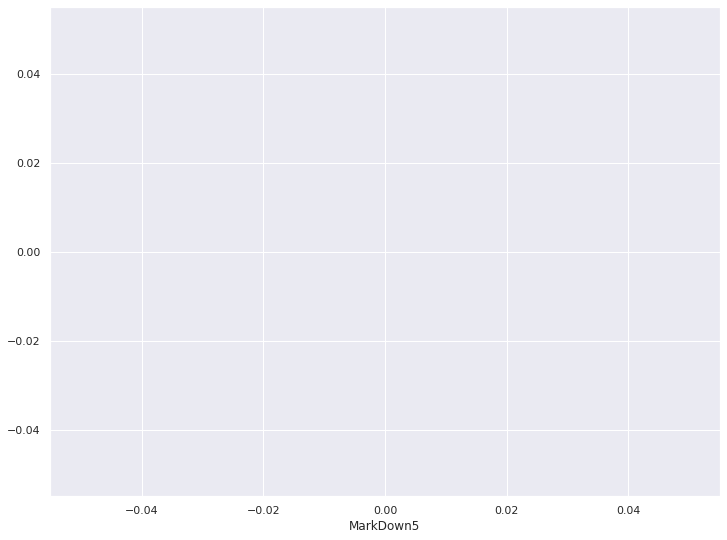

In [ ]:
sns.distplot(mldata['MarkDown5'])

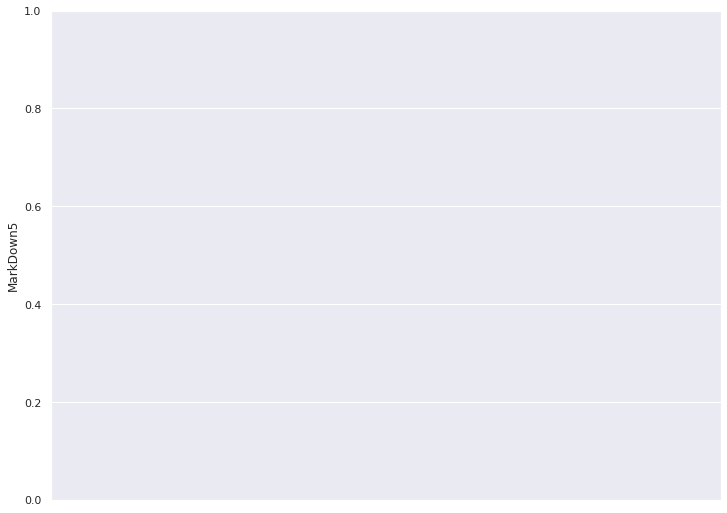

In [ ]:
sns.boxplot(y=mldata['MarkDown5'])

In [ ]:
percentile25 = mldata['MarkDown5'].quantile(0.25)
percentile75 = mldata['MarkDown5'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

nan

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit nan
Lower limit nan


In [ ]:
mldata['MarkDown5'] = np.where(
    mldata['MarkDown5'] > upper_limit,
    upper_limit,
    np.where(
        mldata['MarkDown5'] < lower_limit,
        lower_limit,
        mldata['MarkDown5']
    )
)

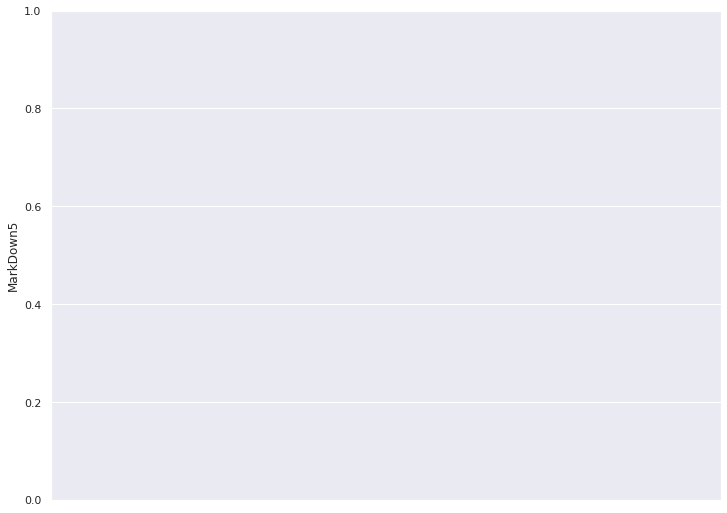

In [ ]:
sns.boxplot(y=mldata['MarkDown5'])

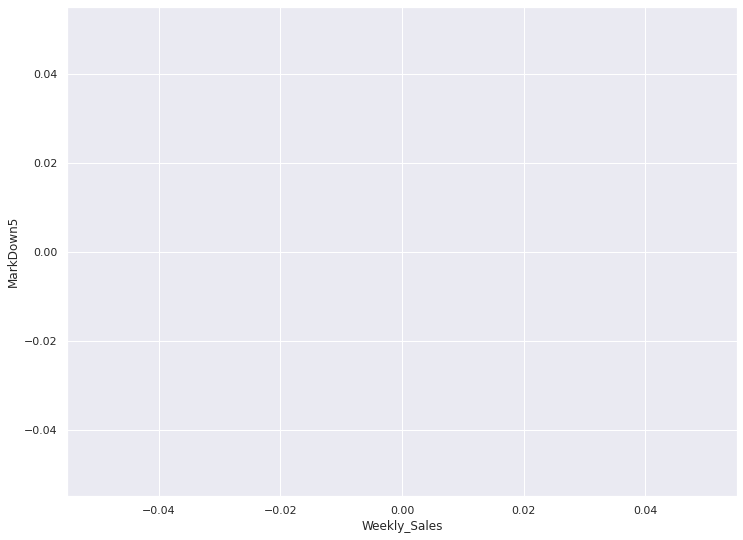

In [ ]:
sns.regplot(x='Weekly_Sales',y='MarkDown5',scatter=True,fit_reg=False,data=mldata)

plot between weeklySales and store

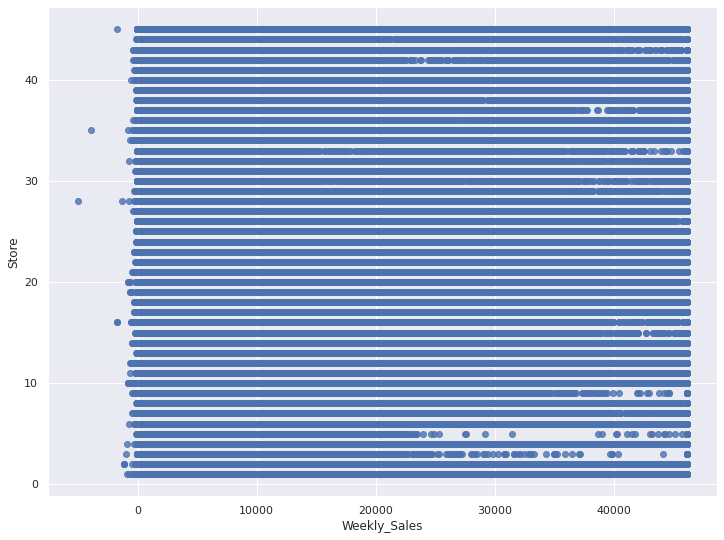

In [ ]:
sns.regplot(x='Weekly_Sales',y='Store',scatter=True,fit_reg=False,data=mldata)

plot between weeklySales and Department

TypeError: ignored

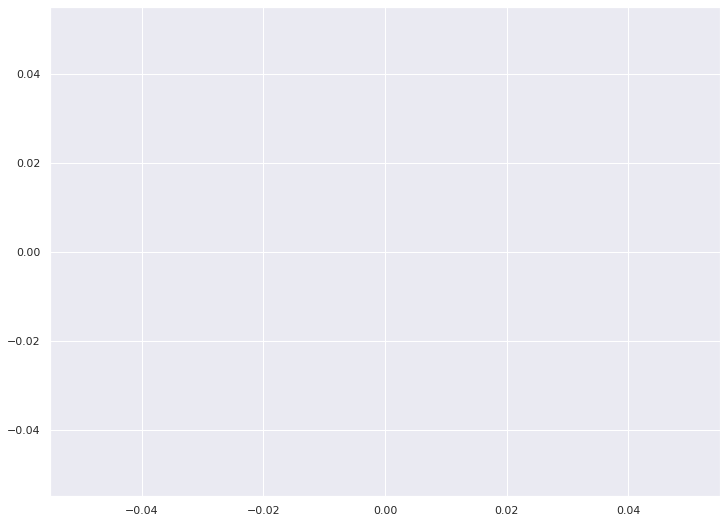

In [ ]:
sns.regplot(x='Weekly_Sales',y='Dept',scatter=True,fit_reg=False,data=mldata)

plot between weeklySales and Date

In [ ]:
sns.regplot(x=mldata['Weekly_Sales'],y=sales['Date'],scatter=True,fit_reg=False)

# **missing values treatment**

In [ ]:
mldata.isnull().sum()

In [ ]:
mldata['MarkDown1']=mldata['MarkDown1'].fillna(0)
mldata['MarkDown2']=mldata['MarkDown2'].fillna(0)
mldata['MarkDown3']=mldata['MarkDown3'].fillna(0)
mldata['MarkDown4']=mldata['MarkDown4'].fillna(0)
mldata['MarkDown5']=mldata['MarkDown5'].fillna(0)
mldata

In [ ]:
mldata.isnull().sum()

In [ ]:
mldata

In [ ]:
mldata1=mldata.copy(deep=True)
mldata1

In [ ]:
corelation=mldata.corr()
round(corelation,3)

In [ ]:
mldata.corr().loc[:,'Weekly_Sales'].abs().sort_values(ascending=False)[1:]

In [ ]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(mldata.corr(), annot=True)

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


num_vars = ['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price','MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5','CPI','Unemployment', 'year', 'month','day']
mldata[num_vars] = scaler.fit_transform(mldata[num_vars])

mldata

# Multiple Regression

In [ ]:
from sklearn.model_selection import train_test_split
mdf_train, mdf_test = train_test_split(mldata, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
# Dividing the training data set into X and Y
my_train = mdf_train.pop('Weekly_Sales')
mX_train = mdf_train
my_test = mdf_test.pop('Weekly_Sales')
mX_test = mdf_test

In [ ]:
from sklearn.linear_model import LinearRegression
mregressor = LinearRegression()
mregressor.fit(mX_train, my_train)

In [ ]:
m = mregressor.coef_
c = mregressor.intercept_,
print("Estimated model weights, m:" , m)
print("Estimated model intercept, c:" , c)

In [ ]:
my_pred_test =  mregressor.predict(mX_test)
my_pred_train =  mregressor.predict(mX_train)

In [ ]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [ ]:
#Training Accuracies
mrmse = math.sqrt(mean_squared_error(my_train, my_pred_train)) 
print('Root mean square error', mrmse) 
mmse = (mean_squared_error(my_train, my_pred_train)) 
print('Mean square error', mmse) 
mmae=mean_absolute_error(my_train, my_pred_train)
print('Mean absolute error', mmae)

In [ ]:
#Training Accuracies
mrmse = math.sqrt(mean_squared_error(my_test, my_pred_test)) 
print('Root mean square error', mrmse) 
mmse = (mean_squared_error(my_test, my_pred_test)) 
print('Mean square error', mmse) 
mmae=mean_absolute_error(my_test, my_pred_test)
print('Mean absolute error', mmae)

Residual plot (plot between predected values and difference between actualvalues and predicted values) for test data

In [ ]:
multipletest_residuals=my_test-my_pred_test
sns.regplot(x=my_pred_test,y=multipletest_residuals,scatter=True,fit_reg=False)

In [ ]:
multipletest_residuals.describe().round(3)

Residual plot (plot between predected values and difference between actualvalues and predicted values) for train data

In [ ]:
multipletrain_residuals=my_train-my_pred_train
sns.regplot(x=my_pred_train,y=multipletrain_residuals,scatter=True,fit_reg=False)

In [ ]:
multipletrain_residuals.describe().round(3)

In [ ]:
import pickle
# Save the model
filename = 'modelmultipleRegressionf.pkl'
pickle.dump(mregressor, open(filename, 'wb'))

# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
ddf_train, ddf_test = train_test_split(mldata, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
# Dividing the training data set into X and Y
dy_train = ddf_train.pop('Weekly_Sales')
dX_train = ddf_train
dy_test = ddf_test.pop('Weekly_Sales')
dX_test = ddf_test

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree # tree diagram
decisionregressor = DecisionTreeRegressor()
decisionregressor.fit(dX_train, dy_train)

In [ ]:
dy_pred_test = decisionregressor.predict(dX_test)
ddf = pd.DataFrame({'Real Values':dy_test, 'Predicted Values':dy_pred_test})
ddf

In [ ]:
dy_pred_train = decisionregressor.predict(dX_train)
ddf = pd.DataFrame({'Real Values':dy_train, 'Predicted Values':dy_pred_train})
ddf

In [ ]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [ ]:
#Training Accuracies
drmse = math.sqrt(mean_squared_error(dy_train, dy_pred_train)) 
print('Root mean square error', drmse) 
dmse = (mean_squared_error(dy_train, dy_pred_train)) 
print('Mean square error', dmse) 
dmae=mean_absolute_error(dy_train, dy_pred_train)
print('Mean absolute error', dmae)

In [ ]:
#Training Accuracies
drmse = math.sqrt(mean_squared_error(dy_test, dy_pred_test)) 
print('Root mean square error', drmse) 
dmse = (mean_squared_error(dy_test, dy_pred_test)) 
print('Mean square error', dmse) 
dmae=mean_absolute_error(dy_test, dy_pred_test)
print('Mean absolute error', dmae)

Residual plot (plot between predected values and difference between actualvalues and predicted values) for test data

In [ ]:
decisiontest_residuals=dy_test-dy_pred_test
sns.regplot(x=dy_pred_test,y=decisiontest_residuals,scatter=True,fit_reg=False)

In [ ]:
decisiontest_residuals.describe()

Residual plot (plot between predected values and difference between actualvalues and predicted values) for train data

In [ ]:
decisiontrain_residuals=dy_train-dy_pred_train
sns.regplot(x=dy_pred_train,y=decisiontrain_residuals,scatter=True,fit_reg=False)

In [ ]:
decisiontrain_residuals.describe().round(3)

In [ ]:
import pickle
# Save the model
filename = 'modeldecisiontreesf.pkl'
pickle.dump(decisionregressor, open(filename, 'wb'))

# Random Forest Model

In [ ]:
from sklearn.model_selection import train_test_split
r_train, r_test = train_test_split(mldata, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
# Dividing the training data set into X and Y
ry_train = r_train.pop('Weekly_Sales')
rX_train = r_train
ry_test = r_test.pop('Weekly_Sales')
rX_test = r_test

In [ ]:

from sklearn.ensemble import RandomForestRegressor
randomregressor = RandomForestRegressor(n_estimators = 5, random_state = 0)  
randomregressor.fit(rX_train, ry_train)

In [ ]:
ry_pred_test = randomregressor.predict(rX_test)
rdf = pd.DataFrame({'Real Values':ry_test, 'Predicted Values':ry_pred_test})
rdf

In [ ]:
ry_pred_train = randomregressor.predict(rX_train)
rdf = pd.DataFrame({'Real Values':ry_train, 'Predicted Values':ry_pred_train})
rdf

error metrics

In [ ]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [ ]:
#Training Accuracies
rrmse = math.sqrt(mean_squared_error(ry_train, ry_pred_train)) 
print('Root mean square error', rrmse) 
rmse = (mean_squared_error(ry_train, ry_pred_train)) 
print('Mean square error', rmse) 
rmae=mean_absolute_error(ry_train, ry_pred_train)
print('Mean absolute error', rmae)

In [ ]:
#Training Accuracies
rrmse = math.sqrt(mean_squared_error(ry_test, ry_pred_test)) 
print('Root mean square error', rmse) 
rmse = (mean_squared_error(ry_test, ry_pred_test)) 
print('Mean square error', rmse) 
rmae=mean_absolute_error(ry_test, ry_pred_test)
print('Mean absolute error', rmae)

Residual plot
(plot between  predected values and difference between actualvalues and predicted values) for test data

In [ ]:

radomtest_residuals=ry_test-ry_pred_test
sns.regplot(x=ry_pred_test,y=radomtest_residuals,scatter=True,fit_reg=False)

In [ ]:
radomtest_residuals.describe()


Residual plot (plot between predected values and difference between actualvalues and predicted values) for train data

In [ ]:
radomtrain_residuals=ry_train-ry_pred_train
sns.regplot(x=ry_pred_train,y=radomtrain_residuals,scatter=True,fit_reg=False)

In [ ]:
radomtrain_residuals.describe()

In [ ]:
import pickle
# Save the model
filename = 'modelradomforest5.pkl'
pickle.dump(randomregressor, open(filename, 'wb'))